# TensorFlow 进阶

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib
from tensorflow import keras

np.set_printoptions(threshold=16, suppress=True, precision=5)
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.titlesize'] = 20
matplotlib.rcParams['figure.figsize'] = [9, 7]
matplotlib.rcParams['font.family'] = ['Noto Sans CJK JP']
matplotlib.rcParams['axes.unicode_minus']=False 


gpus = tf.config.experimental.list_physical_devices("GPU")
try:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
except RuntimeError as e:
    print(e)

## 1 合并与分割
类似numpy 中的split concatenate stack等操作
---


### 拼接 concat
类似 `numpy.concatenate `拼接操作并不会产生新的维度，仅在现有的维度上合并

In [5]:
# 班级 学生 科目
a = tf.random.normal([2, 35, 8])
b = tf.random.normal([4, 35, 8])

tf.concat([a, b], axis=0)  # 按班级维度合并

<tf.Tensor: shape=(6, 35, 8), dtype=float32, numpy=
array([[[-1.17927,  1.72813, -0.30291, ...,  2.17378,  1.80716,
          1.75754],
        [ 0.13721,  0.93356, -0.47943, ..., -0.27739, -1.52318,
         -0.97674],
        [ 0.24537,  0.53213,  0.39061, ..., -1.42933, -0.01865,
          0.2933 ],
        ...,
        [ 0.80079, -0.59206,  1.16129, ...,  0.58101, -0.94005,
         -0.49389],
        [-0.88637, -0.62085,  0.95681, ..., -0.49024,  0.16894,
         -1.19339],
        [ 0.95146,  0.65628,  0.08117, ...,  1.07876, -1.67471,
         -0.23451]],

       [[-0.83592,  0.75469, -0.4988 , ...,  1.00539,  2.38961,
         -0.30061],
        [-0.44565, -0.84627,  0.65464, ..., -1.01133, -0.15256,
         -0.26905],
        [ 0.78733, -1.19832,  1.87715, ..., -0.18551,  0.20987,
          1.36449],
        ...,
        [-2.44791,  0.11711,  0.90046, ..., -1.43366,  0.4931 ,
         -0.01765],
        [-1.24453, -0.57275, -0.70462, ..., -0.62799, -1.35826,
         -0.1372

In [6]:
a = tf.random.normal([10, 35, 4])
b = tf.random.normal([10, 35, 4])
tf.concat([a, b], axis=2)  # 在科目维度上合并

<tf.Tensor: shape=(10, 35, 8), dtype=float32, numpy=
array([[[ 1.11642, -0.75802, -0.04421, ..., -0.59299,  1.07847,
          0.06491],
        [ 0.57825, -1.98138, -1.27239, ..., -1.05503, -1.74567,
         -1.19293],
        [ 0.03042,  0.4274 , -0.38465, ...,  0.55297,  0.64891,
          0.36764],
        ...,
        [ 1.84299,  0.20271,  2.7557 , ..., -0.06238,  1.52366,
         -0.90526],
        [ 0.2045 ,  0.79848, -0.36103, ..., -0.8728 , -1.92959,
          3.60812],
        [ 0.34657,  2.57889,  0.94943, ..., -1.27628, -0.4987 ,
          0.24792]],

       [[ 0.52693,  0.19927, -1.58161, ...,  1.22223,  0.84421,
         -0.43423],
        [-1.4867 , -0.33903, -0.40659, ...,  0.04733,  0.87624,
         -0.17162],
        [ 0.03289,  1.27324, -1.60001, ...,  0.15885,  0.81105,
          0.99088],
        ...,
        [ 0.06385, -0.37978,  0.48484, ...,  0.40566,  0.78002,
         -1.11287],
        [ 0.24245, -2.09558, -2.10647, ..., -1.22364,  0.91439,
         -1.056

### 堆叠 Stack
`tf.stack(tensors, axis)`  
类似`numpy.stack`会创建新的维度, 使用方式与`tf.expand_dims`一致, axis 的用法与 tf.expand_dims 的一致，当axis ≥ 0时，在 axis之前插入；当axis < 0时，在 axis 之后插入新维度

In [7]:
# 合并2个班级的成绩
a = tf.random.normal([35, 8])
b = tf.random.normal([35, 8])
tf.stack([a, b], axis=0)  # 班级维度在最前

<tf.Tensor: shape=(2, 35, 8), dtype=float32, numpy=
array([[[-1.03401,  0.58434,  1.35027, ...,  0.03611, -1.10783,
         -0.68616],
        [ 0.4832 ,  0.19221, -1.59042, ..., -0.77513, -0.65495,
          2.03379],
        [-1.04212,  0.32494, -0.08748, ..., -0.20537,  0.46076,
         -0.53154],
        ...,
        [ 2.57423,  0.50731,  0.40075, ..., -1.37178,  0.62117,
          0.07007],
        [ 0.85563, -1.64098, -0.36799, ...,  1.08031, -2.62117,
          0.32586],
        [-0.92398, -1.19775, -1.23734, ...,  0.90967, -0.88918,
         -0.17785]],

       [[ 0.39925, -0.76   ,  2.43246, ..., -0.12776, -0.81865,
         -0.71089],
        [ 0.24533, -0.41874, -0.17023, ..., -1.7569 , -2.14535,
         -0.65236],
        [ 1.09224,  0.368  ,  0.05838, ..., -0.32718,  0.66122,
         -0.8829 ],
        ...,
        [-0.95284, -0.82848,  0.30298, ..., -0.04994,  0.50769,
         -0.07856],
        [ 1.51972,  1.68321,  0.45115, ..., -0.46979, -1.38285,
         -1.4597

In [8]:
tf.stack([a, b], axis=-1)  # 班级维度在最后

<tf.Tensor: shape=(35, 8, 2), dtype=float32, numpy=
array([[[-1.03401,  0.39925],
        [ 0.58434, -0.76   ],
        [ 1.35027,  2.43246],
        ...,
        [ 0.03611, -0.12776],
        [-1.10783, -0.81865],
        [-0.68616, -0.71089]],

       [[ 0.4832 ,  0.24533],
        [ 0.19221, -0.41874],
        [-1.59042, -0.17023],
        ...,
        [-0.77513, -1.7569 ],
        [-0.65495, -2.14535],
        [ 2.03379, -0.65236]],

       [[-1.04212,  1.09224],
        [ 0.32494,  0.368  ],
        [-0.08748,  0.05838],
        ...,
        [-0.20537, -0.32718],
        [ 0.46076,  0.66122],
        [-0.53154, -0.8829 ]],

       ...,

       [[ 2.57423, -0.95284],
        [ 0.50731, -0.82848],
        [ 0.40075,  0.30298],
        ...,
        [-1.37178, -0.04994],
        [ 0.62117,  0.50769],
        [ 0.07007, -0.07856]],

       [[ 0.85563,  1.51972],
        [-1.64098,  1.68321],
        [-0.36799,  0.45115],
        ...,
        [ 1.08031, -0.46979],
        [-2.62117, -1.

### 分割 split
tf.split(x, num_or_size_splits, axis)  
当 num_or_size_splits 为单个数值时，如 10，表示等长切割为 10 份；当 num_or_size_splits 为 List 时，List 的每个元素表示每份的长度，如\[2,4,2,2\]表示切割为 4 份，每份的长度依次是 2、4、2、2。


In [9]:
x = tf.random.normal([10, 35, 8])
result = tf.split(x, 10, axis=0)
len(result)

10

In [10]:
result[0]

<tf.Tensor: shape=(1, 35, 8), dtype=float32, numpy=
array([[[-2.75263,  0.54517, -2.58883, ...,  2.95116, -0.61343,
          0.47472],
        [ 0.02041,  0.03005, -0.74341, ...,  0.67366, -0.72458,
          0.30951],
        [ 0.94438, -0.06259,  2.13757, ..., -0.85107,  0.34304,
         -0.43894],
        ...,
        [ 0.65604,  0.57455, -0.91414, ..., -0.01446,  0.62809,
         -1.15361],
        [ 1.53957,  0.68339, -0.63226, ..., -0.55104,  0.11697,
         -0.12224],
        [-0.17316, -0.18458,  0.5729 , ..., -0.46206, -1.17811,
         -0.05217]]], dtype=float32)>

In [11]:
# 不等长分割
x = tf.random.normal([10, 35, 8])
result = tf.split(x, [3, 3, 2, 2], axis=0)
result[0].shape, result[1].shape, result[2].shape, result[3].shape

(TensorShape([3, 35, 8]),
 TensorShape([3, 35, 8]),
 TensorShape([2, 35, 8]),
 TensorShape([2, 35, 8]))

In [12]:
# 在某个维度上全部按长度为1的方式分割
x = tf.random.normal([10, 35, 8])
result = tf.unstack(x, axis=0)
len(result)

10

In [13]:
result[0]  # 原来的维度消失了

<tf.Tensor: shape=(35, 8), dtype=float32, numpy=
array([[-0.11948, -1.49593, -0.89212, ...,  1.37024,  0.53135, -0.06628],
       [ 1.01712,  1.82416, -0.08397, ..., -0.84997,  0.57222,  1.27142],
       [-1.51908,  2.6549 , -0.23353, ...,  2.33359,  2.52101,  0.00691],
       ...,
       [ 0.02531, -0.42402,  1.47029, ..., -0.52236, -0.81946,  2.51583],
       [-0.03713, -1.27316,  1.9433 , ...,  0.12073, -0.31806, -0.29292],
       [ 0.57572, -0.38125,  0.73465, ...,  0.01788,  0.29975,  0.16092]],
      dtype=float32)>

## 2 数据统计 stats


### 向量范数

向量范数(Vector Norm)是表征向量“长度”的一种度量方法，它可以推广到张量上。在神经网络中，常用来表示张量的权值大小，梯度大小等.
- L1范数, 向量x的所有元素绝对值之和
- L2范数, 向量x的所有元素的平方和, 再开根号
- $\infty$范数, 为向量𝒙的所有元素绝对值的最大值

In [2]:
x = tf.ones([2, 2])
tf.norm(x, ord=1)  # L1范数

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

In [3]:
tf.norm(x, ord=2)

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [4]:
tf.norm(x, np.inf)

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

### 最值、均值、和

In [7]:
x = tf.random.normal([4, 10])  # 4个样本x分属10个类别的概率
tf.reduce_max(x, axis=1) # 统计概率维度上的最大值, 每个样本的最大概率

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([1.62448, 1.1541 , 1.84995, 0.64838], dtype=float32)>

In [8]:
tf.reduce_min(x, axis=1)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-1.93814, -1.47843, -1.58611, -2.38652], dtype=float32)>

In [9]:
tf.reduce_mean(x, axis=1)  # 统计概率维度上的均值

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-0.0169 , -0.18149,  0.00502, -0.1294 ], dtype=float32)>

In [10]:
# 不指定axis, 统计全局
tf.reduce_max(x), tf.reduce_min(x), tf.reduce_mean(x)

(<tf.Tensor: shape=(), dtype=float32, numpy=1.8499497>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-2.386523>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-0.08069338>)

In [11]:
tf.reduce_sum(x, axis=-1)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-0.16901, -1.81488,  0.05018, -1.29402], dtype=float32)>

In [19]:
# argmax, argmin与numpy中的使用相同

out = tf.random.normal([2, 8])
out = tf.nn.softmax(out, axis=1)  # 通过 softmax 函数转换为概率值
out

<tf.Tensor: shape=(2, 8), dtype=float32, numpy=
array([[0.24754, 0.02748, 0.13631, 0.12944, 0.19738, 0.11557, 0.08279,
        0.06349],
       [0.08872, 0.13109, 0.06107, 0.02325, 0.16851, 0.28538, 0.0507 ,
        0.19128]], dtype=float32)>

In [21]:
pred_max = tf.argmax(out, axis=1)
pred_max

<tf.Tensor: shape=(2,), dtype=int64, numpy=array([0, 5])>

## 3 张量的比较


关于softmax  
一组数V, $V_i$表示V中第i个元素, 这个元素的softmax值:
$$S_i = \frac {e^i}{\sum_j e^j}$$


In [22]:
out = tf.random.normal([100, 10])
out = tf.nn.softmax(out, axis=1)  # 输出转为概率
pred = tf.argmax(out, axis=1)  # 预测值(取概率最大))
pred

<tf.Tensor: shape=(100,), dtype=int64, numpy=array([6, 2, 4, ..., 4, 3, 3])>

In [27]:
# 模拟真是标签
y = tf.random.uniform([100], maxval=10, dtype=tf.int64)
y

<tf.Tensor: shape=(100,), dtype=int64, numpy=array([3, 4, 4, ..., 7, 7, 4])>

In [28]:
out = tf.equal(y, pred)  # 预测值与真实值比较  注意数值类型要相同
out

<tf.Tensor: shape=(100,), dtype=bool, numpy=array([False, False,  True, ..., False, False, False])>

In [32]:
out = tf.cast(out, dtype=tf.int32)  # bool -> int
correct = tf.reduce_sum(out)  # 统计分类正确的
correct

<tf.Tensor: shape=(), dtype=int32, numpy=15>

In [33]:
a = tf.constant([1, 2, 3, 4])
b = tf.constant([1, 1, 2, 5])
tf.math.greater(a, b)

<tf.Tensor: shape=(4,), dtype=bool, numpy=array([False,  True,  True, False])>

![](./比较函数.png)

## 4 填充与复制
对于图片数据的高和宽、序列信号的长度，维度长度可能各不相同。为了方便网络的
并行计算，需要将不同长度的数据扩张为相同长度，之前我们介绍了通过复制的方式可以
增加数据的长度，但是重复复制数据会破坏原有的数据结构，并不适合于此处。通常的做
法是，在需要补充长度的数据开始或结束处填充足够数量的特定数值，这些特定数值一般
代表了无效意义，例如 0，使得填充后的长度满足系统要求。那么这种操作就叫作填充
(Padding)

In [4]:
a = tf.constant([1, 2, 3])
tf.tile(a, [2])

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([1, 2, 3, 1, 2, 3], dtype=int32)>

In [6]:
a = tf.constant([1, 2, 3, 4, 5, 6])  # 第一个句子
b = tf.constant([7, 8, 1, 9])  # 第二个
# (x, padding)  [[left padding, right padding], [left padding, right padding] ...]
b = tf.pad(b, [[0, 2]])  # 在第一个维度右边填充2个单元(左边0个)
b

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([7, 8, 1, 9, 0, 0], dtype=int32)>

In [7]:
# 2个句子形状相同合并
tf.stack([a, b], axis=0)

<tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[1, 2, 3, 4, 5, 6],
       [7, 8, 1, 9, 0, 0]], dtype=int32)>

在NLP中, 为了让不同长度的句子数据保存在同一张量中, 一般会选择一个阈值(如80).小于阈值的, 在末尾填充相应数量的0; 大于阈值的, 截断超过规定长度的部分单词.

In [2]:
total_words = 10000  # 词汇总量
max_review_len = 80  # 阈值
enbedding_len = 100  # 词向量长度 

In [3]:
# 加载IMDB数据集
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data(num_words=total_words)

In [ ]:
# 将句子填充或截断到相同长度，设置为末尾填充和末尾截断方式 (post/pre)
X_train = keras.preprocessing.sequence.pad_sequences(
    X_train, maxlen=max_review_len, truncating='post', padding='post')

## 5 数据限幅

考虑怎么实现非线性激活函数 ReLU 的问题。它其实可以通过简单的数据限幅运算实现，限制元素的范围$x \in [0, +\infty)$即可

In [9]:
x = tf.range(9)
# Returns the max of x and y (i.e. x > y ? x : y) element-wise.
tf.maximum(x, 5)  # 低于5的返回5(下限为5)

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([5, 5, 5, 5, 5, 5, 6, 7, 8], dtype=int32)>

In [10]:
tf.minimum(x, 4)

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 4, 4, 4, 4], dtype=int32)>

In [11]:
tf.clip_by_value(x, 2, 7)  # 限副2~7

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([2, 2, 2, 3, 4, 5, 6, 7, 7], dtype=int32)>

## 6 高级操作

### tf.gather 以实现根据索引号收集数据的目的

In [12]:
# 4个班级 35人 8科目 成绩
x = tf.random.uniform([4, 35, 8], maxval=100, dtype=tf.int32)

In [13]:
# 收集 班级1~2的成绩
tf.gather(x, [0, 1], axis=0)  # x[0:2]

<tf.Tensor: shape=(2, 35, 8), dtype=int32, numpy=
array([[[26, 13, 15, ..., 67, 47, 96],
        [84, 93, 83, ..., 65, 72, 99],
        [85,  3, 45, ..., 15, 24, 72],
        ...,
        [36, 57, 95, ..., 31, 11, 16],
        [29, 96, 47, ..., 12, 39, 72],
        [42, 14, 54, ..., 18, 15, 24]],

       [[83,  9, 31, ..., 78,  0, 54],
        [ 8, 40, 57, ..., 30,  1, 27],
        [74, 95, 76, ..., 50, 86, 99],
        ...,
        [13, 23, 54, ..., 91, 42, 40],
        [80, 82, 75, ..., 54, 61, 10],
        [18, 94, 99, ..., 19,  2,  5]]], dtype=int32)>

In [ ]:
# 各班 1, 4, 9, 16 ... 学生成绩
tf.gather(x, [1, 4, 9, 16], axis=1)

### tf.gather_nd
通过 tf.gather_nd 函数，可以通过指定每次采样点的多维坐标来实现采样多个点的目的

In [14]:
# 收集多维数据 2班2号 3班3号...
tf.gather_nd(x, [[1, 1], [2, 2], [3, 3]])

<tf.Tensor: shape=(3, 8), dtype=int32, numpy=
array([[ 8, 40, 57, ..., 30,  1, 27],
       [36,  7,  7, ..., 65, 38, 15],
       [14, 10, 45, ..., 43, 76, 38]], dtype=int32)>

### boolean_mask
给定掩码的方式进行采样

In [15]:
tf.boolean_mask(x, mask=[True, False, False, True], axis=0)

<tf.Tensor: shape=(2, 35, 8), dtype=int32, numpy=
array([[[26, 13, 15, ..., 67, 47, 96],
        [84, 93, 83, ..., 65, 72, 99],
        [85,  3, 45, ..., 15, 24, 72],
        ...,
        [36, 57, 95, ..., 31, 11, 16],
        [29, 96, 47, ..., 12, 39, 72],
        [42, 14, 54, ..., 18, 15, 24]],

       [[93, 85,  2, ..., 18,  4, 58],
        [26, 32, 97, ..., 31, 61,  5],
        [23, 98, 42, ..., 63, 81, 87],
        ...,
        [74, 14, 35, ..., 57, 60, 17],
        [95, 50, 77, ..., 61, 30, 39],
        [ 4, 17, 69, ..., 72, 82, 15]]], dtype=int32)>

In [ ]:
x = tf.random.uniform([2, 3, 8], maxval=100, dtype=tf.int32)
# 多维掩码  1班1号 2班2号
tf.boolean_mask(x, [[True, False, False], [False, True, False]])

### tf.where
类似np.where

In [16]:
a = np.ones([3, 3])
b = np.zeros([3, 3])
cond = tf.constant([[True,False,False],[False,True,False],[True,True,False]])
tf.where(cond, a, b)

<tf.Tensor: shape=(3, 3), dtype=float64, numpy=
array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 1., 0.]])>

In [17]:
x = tf.random.normal([3, 3])
x

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[-0.01313, -1.09072, -0.28118],
       [ 0.28584, -0.09958, -0.94752],
       [ 0.29857, -1.93419,  0.53349]], dtype=float32)>

In [18]:
tf.where(x>0, 1, -1)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[-1, -1, -1],
       [ 1, -1, -1],
       [ 1, -1,  1]], dtype=int32)>

In [20]:
x[x>0]

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.28584, 0.29857, 0.53349], dtype=float32)>

### sctter_nd
通过 tf.scatter_nd(indices, updates, shape)函数可以高效地刷新张量的部分数据，但是这个函数只能在全 0 的白板张量上面执行刷新操作
```
tf.scatter_nd(
    indices, updates, shape, name=None
)
```

In [21]:
# 待更新的位置
indices = tf.constant([[4], [3], [1], [2]])
# 更新值
updates = tf.constant([4.4, 3.3, 1.1, 2.2])

tf.scatter_nd(indices, updates, [8])

<tf.Tensor: shape=(8,), dtype=float32, numpy=array([0. , 1.1, 2.2, 3.3, 4.4, 0. , 0. , 0. ], dtype=float32)>

In [22]:
# 3维张量刷新
# 2x4x4  更新到  4x4x4  
indices = tf.constant([[1], [3]])
updates = tf.constant([
    [[5, 5, 5, 5], [6, 6, 6, 6], [7, 7, 7, 7], [8, 8, 8, 8]],
    [[1, 1, 1, 1], [2, 2, 2, 2], [3, 3, 3, 3], [4, 4, 4, 4]]
])
tf.scatter_nd(indices, updates, [4, 4, 4])

<tf.Tensor: shape=(4, 4, 4), dtype=int32, numpy=
array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[5, 5, 5, 5],
        [6, 6, 6, 6],
        [7, 7, 7, 7],
        [8, 8, 8, 8]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 3],
        [4, 4, 4, 4]]], dtype=int32)>

### meshgrid
类似 `np.meshgrid`函数

In [26]:
np.mgrid[0:10:1, 0:10:1]

array([[[0, 0, 0, ..., 0, 0, 0],
        [1, 1, 1, ..., 1, 1, 1],
        [2, 2, 2, ..., 2, 2, 2],
        ...,
        [7, 7, 7, ..., 7, 7, 7],
        [8, 8, 8, ..., 8, 8, 8],
        [9, 9, 9, ..., 9, 9, 9]],

       [[0, 1, 2, ..., 7, 8, 9],
        [0, 1, 2, ..., 7, 8, 9],
        [0, 1, 2, ..., 7, 8, 9],
        ...,
        [0, 1, 2, ..., 7, 8, 9],
        [0, 1, 2, ..., 7, 8, 9],
        [0, 1, 2, ..., 7, 8, 9]]])

In [27]:
x = tf.linspace(-8., 8, 100)
y = tf.linspace(-8., 8, 100)
x, y = tf.meshgrid(x, y)  # 生成网格

In [28]:
z = tf.sqrt(x**2 + y**2)
z = tf.sin(z) / z

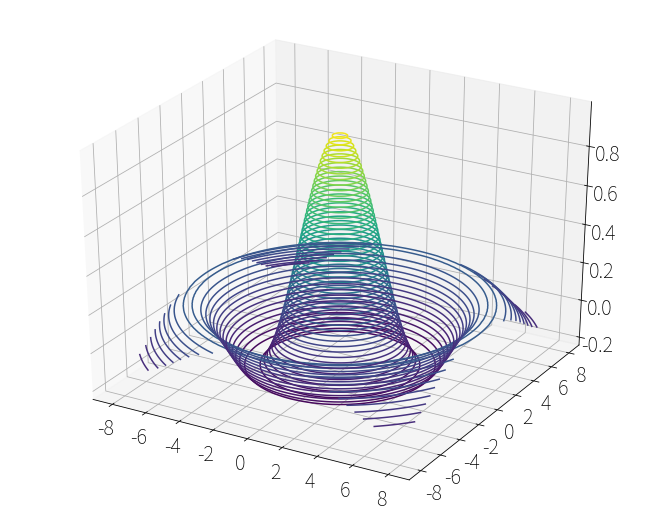

In [29]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.contour3D(x.numpy(), y.numpy(), z.numpy(), 50)


## 7 经典数据集的加载和预处理
`tf.keras.datasets` 数据集对象

- Boston Housing，波士顿房价趋势数据集，用于回归模型训练与测试。
- CIFAR10/100，真实图片数据集，用于图片分类任务。
- MNIST/Fashion_MNIST，手写数字图片数据集，用于图片分类任务。
- IMDB，情感分类任务数据集，用于文本分类任务

加载方式`datasets.xxx.load_data()`, 所有的数据都用 Numpy 数组容器保存

In [34]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [39]:
X_train.shape

(60000, 28, 28)

数据加载进入内存后，需要转换成 Dataset 对象，才能利用 TensorFlow 提供的各种便捷功能。

In [38]:
train_db = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_db  # 类似生成器

<TensorSliceDataset shapes: ((28, 28), ()), types: (tf.uint8, tf.uint8)>

转成Dataset对象后, 在添加一系列数据集标准处理步骤

In [40]:
# 随机打散
# For perfect shuffling, a buffer size greater than or equal to the full size of the dataset is required
train_db = train_db.shuffle(10000)

调用 Dataset提供的这些工具函数会返回新的 Dataset 对象，可以通过
```
db = db. step1(). step2(). step3.()
```

In [41]:
# 批训练 会同时计算多个样本
train_db = train_db.batch(128)

In [42]:
# 预处理 train_db.map(processing)
def processing(x, y):
    # [0, 255] -> [0, 1]
    x = tf.cast(x, dtype=tf.float32) / 255.
    x = tf.reshape(x, [-1, 28*28])  # 展平
    y = tf.cast(y, dtype=tf.int32)
    y = tf.one_hot(y, depth=10)  # 独热码
    return x, y
train_db = train_db.map(processing)

In [44]:
# 循环训练
for epoch in range(20): # 训练 Epoch 数
    for step, (x, y) in enumerate(train_db):  # 迭代数据集
        pass

0 loss: 0.5642589926719666
0 Evaluate Acc: 0.0789
80 loss: 0.18212652206420898
80 Evaluate Acc: 0.2021
160 loss: 0.1449025571346283
160 Evaluate Acc: 0.298
240 loss: 0.12058045715093613
240 Evaluate Acc: 0.3697
320 loss: 0.1112261563539505
320 Evaluate Acc: 0.427
400 loss: 0.10225649178028107
400 Evaluate Acc: 0.4691
480 loss: 0.09891005605459213
480 Evaluate Acc: 0.5092
560 loss: 0.0937003344297409
560 Evaluate Acc: 0.5374
640 loss: 0.08810508251190186
640 Evaluate Acc: 0.564
720 loss: 0.07985768467187881
720 Evaluate Acc: 0.5862
800 loss: 0.07393255829811096
800 Evaluate Acc: 0.6066
880 loss: 0.07804299890995026
880 Evaluate Acc: 0.6226
960 loss: 0.07739649713039398
960 Evaluate Acc: 0.6365
1040 loss: 0.07072490453720093
1040 Evaluate Acc: 0.6509
1120 loss: 0.07508011162281036
1120 Evaluate Acc: 0.6613
1200 loss: 0.06599877029657364
1200 Evaluate Acc: 0.6702
1280 loss: 0.06994328647851944
1280 Evaluate Acc: 0.6792
1360 loss: 0.07012853771448135
1360 Evaluate Acc: 0.6879
1440 loss: 0.

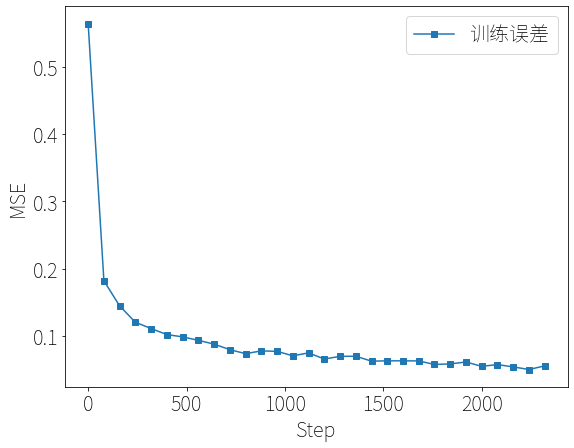

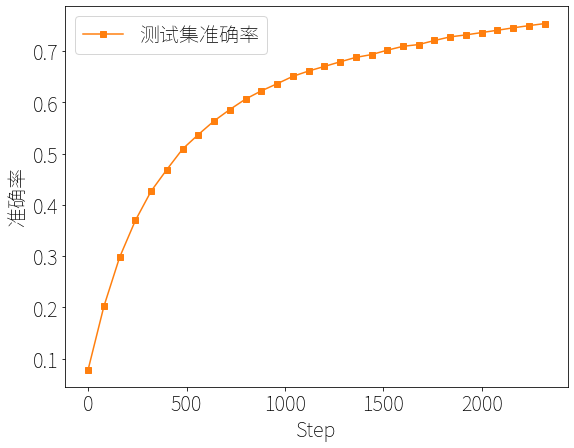

In [62]:
# MNIST 测试实战

def processing(x, y):
    # [0, 255] -> [0, 1]
    x = tf.cast(x, dtype=tf.float32) / 255.
    x = tf.reshape(x, [-1, 28*28])  # 展平
    y = tf.cast(y, dtype=tf.int32)
    y = tf.one_hot(y, depth=10)  # 独热码
    return x, y

lr = 1e-2
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

train_db = tf.data.Dataset.from_tensor_slices((X_train, y_train))
# 最外层迭代20次
train_db = train_db.shuffle(1000).batch(512).map(processing).repeat(20)

test_db = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_db = test_db.shuffle(1000).batch(512).map(processing)


w1, b1 = tf.Variable(tf.random.normal([784, 256], stddev=0.1)), tf.Variable(tf.zeros([256]))
w2, b2 = tf.Variable(tf.random.normal([256, 128], stddev=0.1)), tf.Variable(tf.zeros([128]))
w3, b3 = tf.Variable(tf.random.normal([128, 10], stddev=0.1)), tf.Variable(tf.zeros([10]))
losses = []
accurancy = []


for step, (x, y) in enumerate(train_db):
    with tf.GradientTape() as tape:
        h1 = x @ w1 + b1
        h1 = tf.nn.relu(h1)
        h2 = h1 @ w2 + b2
        h2 = tf.nn.relu(h2)
        out = h2 @ w3 + b3

        loss = tf.square(y-out)
        loss = tf.reduce_mean(loss)
    # 计算梯度
    grads = tape.gradient(loss, [w1, b1, w2, b2, w3, b3])
    # 梯度下降
    for p, g in zip([w1, b1, w2, b2, w3, b3], grads):
        p.assign_sub(lr * g)
    
    # print 80次迭代 查看误差, 正确率
    if step % 80 == 0:
        print(step, 'loss:', float(loss))
        losses.append(float(loss))

        total_correct, nums = 0., X_test.shape[0]
        for x, y in test_db:
            # out = tf.nn.relu(tf.nn.relu(x@w1 + b1) @ w2 + b2) @ w3 + b3
            h1 = x @ w1 + b1
            h1 = tf.nn.relu(h1)
            h2 = h1 @ w2 + b2
            h2 = tf.nn.relu(h2)
            out = h2 @ w3 + b3
            # 预测的标签
            y_pred = tf.argmax(out, axis=1)
            # 实际标签
            y_ = tf.argmax(y, axis=1)
            # 正确的
            correct = tf.cast(tf.equal(y_pred, y_), dtype=tf.int32)
            total_correct += tf.reduce_sum(correct).numpy()

        print(step, 'Evaluate Acc:', total_correct/nums)
        accurancy.append(total_correct/nums)

x = [i*80 for i in range(len(losses))]
plt.figure()
plt.plot(x, losses, color='C0', marker='s', label='训练误差')
plt.ylabel('MSE')
plt.xlabel('Step')
plt.legend()
plt.savefig('train.svg')

x = [i*80 for i in range(len(accurancy))]
plt.figure()
plt.plot(x, accurancy, color='C1', marker='s', label='测试集准确率')
plt.ylabel('准确率')
plt.xlabel('Step')
plt.legend()
plt.savefig('train.svg')

In [47]:
60000 / 256

234.375